<h3>Build Time Series Model that will forecast a Country’s Foreign Exchange Rate for the next 10 years</h3>
<h4>Using either ARIMAX, SARIMAX, Fbprophet Algorithms </h4>

In [108]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

<div class="alert alert-block alert-success">
<b>Data Preparation</b> 
</div>

In [17]:
#read it with Pandas
data = pd.read_csv('Foreign_Exchange_Rates.csv', na_values = 'ND')

In [109]:
#make the col names to lower and convert spaces in data to "_"

data.columns = data.columns.str.lower().str.replace('-','_').str.replace(' ','_').str.replace('$','_').str.replace('___',"_").str.replace('/',"_")
data.head(10)

,unnamed:_0,time_serie,australia_australian_dollar_us_,euro_area_euro_us_,new_zealand_new_zeland_dollar_us_,united_kingdom_united_kingdom_pound_us_,brazil_real_us_,canada_canadian_dollar_us_,china_yuan_us_,hong_kong_hong_kong_dollar_us_,...,singapore_singapore_dollar_us_,denmark_danish_krone_us_,japan_yen_us_,malaysia_ringgit_us_,norway_norwegian_krone_us_,sweden_krona_us_,sri_lanka_sri_lankan_rupee_us_,switzerland_franc_us_,taiwan_new_taiwan_dollar_us_,thailand_baht_us_
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8,7.9640,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8,7.9340,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8,7.9350,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.9400,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.9660,8.4150,73.15,1.5623,30.85,37.30
5,5,2000-01-10,1.5242,0.9754,1.9350,0.6107,1.8190,1.4568,8.2794,7.7785,...,1.6618,7.2540,105.28,3.8,8.0240,8.4490,73.30,1.5704,30.83,37.27
6,6,2000-01-11,1.5209,0.9688,1.9365,0.6068,1.8225,1.4570,8.2795,7.7785,...,1.6690,7.2140,106.09,3.8,7.9690,8.3970,73.35,1.5605,30.83,37.61
7,7,2000-01-12,1.5202,0.9727,1.9286,0.6073,1.8350,1.4550,8.2796,7.7787,...,1.6690,7.2360,105.76,3.8,7.9770,8.4180,73.35,1.5660,30.80,37.54
8,8,2000-01-13,1.4954,0.9737,1.9084,0.6067,1.8140,1.4495,8.2798,7.7788,...,1.6700,7.2520,106.09,3.8,7.9425,8.4170,73.35,1.5707,30.80,37.49
9,9,2000-01-14,1.5004,0.9874,1.9186,0.6115,1.8050,1.4497,8.2797,7.7789,...,1.6752,7.3470,105.86,3.8,7.9970,8.4740,73.35,1.5945,30.83,37.55


In [87]:
#convert spaces in data to "_"

string_cols = list(data.dtypes[data.dtypes == "object"].index)

for col in string_cols:
    data[col] = data[col].str.lower().str.replace(" ", "_")

<div class="alert alert-block alert-success">
<b>Exploratory Data Analysis</b> 
</div>

<div class="alert alert-block alert-warning">
<p> => Drop missed data</p>
</div>

In [139]:
data = data.dropna()

In [140]:
data.isnull().sum()

unnamed:_0                                 0
time_serie                                 0
australia_australian_dollar_us_            0
euro_area_euro_us_                         0
new_zealand_new_zeland_dollar_us_          0
united_kingdom_united_kingdom_pound_us_    0
brazil_real_us_                            0
canada_canadian_dollar_us_                 0
china_yuan_us_                             0
hong_kong_hong_kong_dollar_us_             0
india_indian_rupee_us_                     0
korea_won_us_                              0
mexico_mexican_peso_us_                    0
south_africa_rand_us_                      0
singapore_singapore_dollar_us_             0
denmark_danish_krone_us_                   0
japan_yen_us_                              0
malaysia_ringgit_us_                       0
norway_norwegian_krone_us_                 0
sweden_krona_us_                           0
sri_lanka_sri_lankan_rupee_us_             0
switzerland_franc_us_                      0
taiwan_new

<div class="alert alert-block alert-warning">
<p> => There's no duplicated data </p>
</div>

In [110]:
duplicated_values = data.duplicated().sum()
duplicated_values

0

<div class="alert alert-block alert-success">
<b>Visulaization</b> 
</div>

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [127]:
data.columns

Index(['unnamed:_0', 'time_serie', 'australia_australian_dollar_us_',
       'euro_area_euro_us_', 'new_zealand_new_zeland_dollar_us_',
       'united_kingdom_united_kingdom_pound_us_', 'brazil_real_us_',
       'canada_canadian_dollar_us_', 'china_yuan_us_',
       'hong_kong_hong_kong_dollar_us_', 'india_indian_rupee_us_',
       'korea_won_us_', 'mexico_mexican_peso_us_', 'south_africa_rand_us_',
       'singapore_singapore_dollar_us_', 'denmark_danish_krone_us_',
       'japan_yen_us_', 'malaysia_ringgit_us_', 'norway_norwegian_krone_us_',
       'sweden_krona_us_', 'sri_lanka_sri_lankan_rupee_us_',
       'switzerland_franc_us_', 'taiwan_new_taiwan_dollar_us_',
       'thailand_baht_us_'],
      dtype='object')

<AxesSubplot:xlabel='time_serie'>

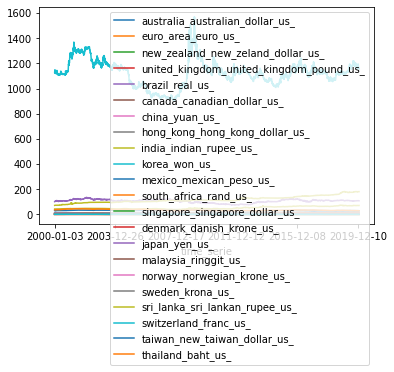

In [133]:
#Plotting the variables to check if the data is stationary
cols = ['australia_australian_dollar_us_',
       'euro_area_euro_us_', 'new_zealand_new_zeland_dollar_us_',
       'united_kingdom_united_kingdom_pound_us_', 'brazil_real_us_',
       'canada_canadian_dollar_us_', 'china_yuan_us_',
       'hong_kong_hong_kong_dollar_us_', 'india_indian_rupee_us_',
       'korea_won_us_', 'mexico_mexican_peso_us_', 'south_africa_rand_us_',
       'singapore_singapore_dollar_us_', 'denmark_danish_krone_us_',
       'japan_yen_us_', 'malaysia_ringgit_us_', 'norway_norwegian_krone_us_',
       'sweden_krona_us_', 'sri_lanka_sri_lankan_rupee_us_',
       'switzerland_franc_us_', 'taiwan_new_taiwan_dollar_us_',
       'thailand_baht_us_']

data.plot(x ='time_serie', y=cols, kind = 'line')